This analysis is motivated by the fact that the runtime of the `TopKLists::CEMC` algorithm on our data set proves to be longer than 5 days.  Here I replace `CEMC` with `Borda` and `MC`.  Important to note that the original motivation of using `CEMC` was that it accepts arbitrary weights on the input ranked lists while the other two functions only accept uniform weights.

In [1]:
library(TopKLists)

Import `input` and `space`, which are later used as inputs to the rank aggregation functions.  We remove the ranked lists for *agora* and *DESudhir* after personal communication with Madhav.

In [2]:
input.csv <- "/Users/jonesa7/CTNS/results/2021-12-31-rank-aggregation/chembl-input.csv"
space.csv <- "/Users/jonesa7/CTNS/results/2021-12-31-rank-aggregation/chembl-space.csv"
input <- read.csv(input.csv, stringsAsFactors = FALSE)
space <- read.csv(space.csv, stringsAsFactors = FALSE)
lists2remove <- c("agora", "DESudhir")
input[lists2remove] <- NULL
space[lists2remove] <- NULL

As we see the `input` ranked lists are ranked ChEMBL IDs.

In [3]:
str(input)

'data.frame':	108 obs. of  8 variables:
 $ knowledge          : chr  "CHEMBL1770916" "CHEMBL520733" "CHEMBL360328" "CHEMBL99946" ...
 $ TWAS2              : chr  "CHEMBL1592" "CHEMBL1165" "CHEMBL577" "CHEMBL3039598" ...
 $ agora2             : chr  "CHEMBL838" "CHEMBL317094" "CHEMBL1592" "CHEMBL1168" ...
 $ ADDE.APOE3.APOE3   : chr  "CHEMBL1121" "CHEMBL1201185" "CHEMBL262135" "CHEMBL1823872" ...
 $ ADDE.APOE4.APOE4   : chr  "CHEMBL927" "CHEMBL1121" "CHEMBL1823872" "CHEMBL262135" ...
 $ APOE34.DE.neuron   : chr  "CHEMBL1909324" "CHEMBL1318287" "CHEMBL1139" "CHEMBL46257" ...
 $ APOE34.DE.astrocyte: chr  "CHEMBL3545043" "CHEMBL2386081" "CHEMBL83626" "CHEMBL3828074" ...
 $ APOE34.DE.microglia: chr  "CHEMBL11662" "CHEMBL428" "CHEMBL1401367" "CHEMBL1255654" ...


`Borda` is lightning fast.

In [4]:
start <- Sys.time()
outBorda <- Borda(input, space)
Sys.time() - start

Time difference of 0.04663086 secs

`MC` is somewhat slower.

In [5]:
start <- Sys.time()
outMC <- MC(input, space)
Sys.time() - start

Time difference of 2.03591 mins

Extract the aggregated list for each specific algorithm of `Borda` and `MC`.

In [6]:
v <- names(outBorda$TopK)
names(v) <- v
agglist.Borda <- data.frame(lapply(v, function(x) outBorda$TopK[[x]]))

v <- c("MC1", "MC2", "MC3")
names(v) <- v
agglist.MC <- data.frame(lapply(v, function(x) outMC[[paste0(x, ".TopK")]]))

## Model fit assessed by Kendall distance

We see that the best performing algorithm is MC3 in terms of its aggregated ranked list's Kendall distance from the `input` ranked lists.

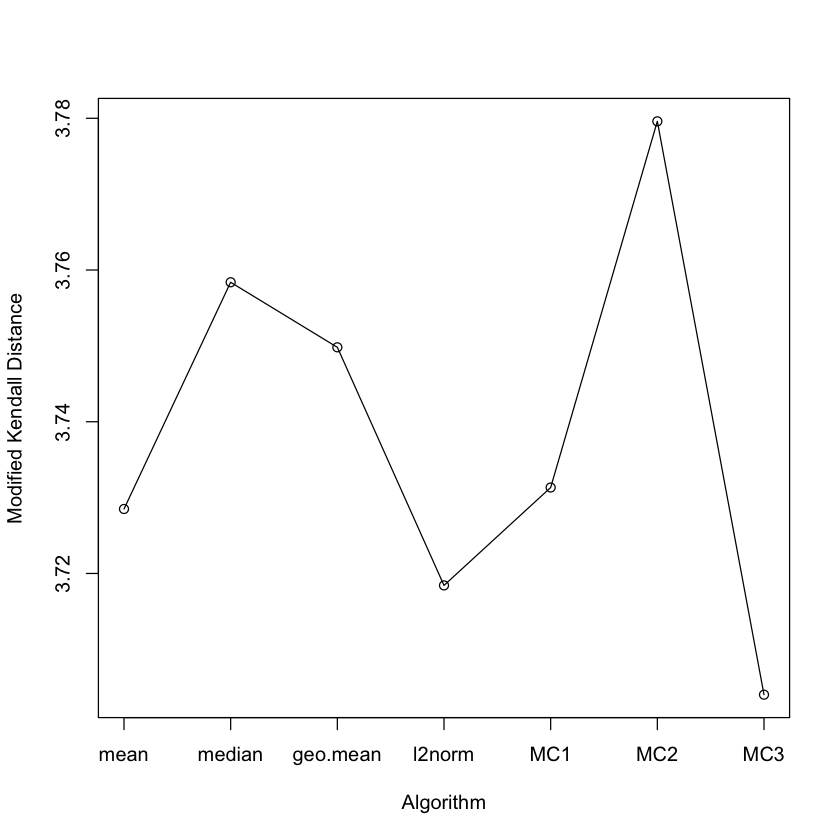

In [7]:
agglist <- cbind(agglist.Borda, agglist.MC)
Kendall.dist <- Kendall.plot(input = input, all.aggregates = agglist, space = space, algorithm = names(agglist))
agglist <- cbind(data.frame(rank = seq_len(nrow(agglist))), agglist)

The aggregated ranked list contains 605 drugs while each of the 8 `input` lists are top $k=110$ lists.  This reflects the small overlap between individual top-$k$ lists.

In [8]:
fpath = "../../results/2022-01-14-rank-aggregation/aggregated-ranks.csv"
write.csv(agglist, fpath, row.names = FALSE)
dim(agglist)

[1] 593   8

In [9]:
fpath <- "../../results/2021-12-02-proximity-various-ADgenesets/merged-proximity-chembl.csv"
drug.info <- read.csv(fpath, skip = 1, as.is = TRUE)[1:6]
names(drug.info)[1] <- "chembl_id"
row.names(drug.info) <- drug.info$chembl_id

v <- names(outBorda$TopK)
names(v) <- v
aggnames.Borda <- data.frame(lapply(v, function(x) drug.info[outBorda$TopK[[x]], "drug_name"]))

v <- c("MC1", "MC2", "MC3")
names(v) <- v
aggnames.MC <- data.frame(lapply(v, function(x) drug.info[outMC[[paste0(x, ".TopK")]], "drug_name"]))

In [10]:
aggnames <- cbind(aggnames.Borda, aggnames.MC)
head(aggnames, n=20)

,mean,median,geo.mean,l2norm,MC1,MC2,MC3
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,ARUNDINE,LACTULOSE,PENTOLINIUM TARTRATE,ARUNDINE,PENTOLINIUM TARTRATE,PENTOLINIUM TARTRATE,PAZOPANIB
2,LACTULOSE,PHENIRAMINE,EPOPROSTENOL,LACTULOSE,EPOPROSTENOL,EPOPROSTENOL,CEDIRANIB
3,PHENIRAMINE,ARUNDINE,ARUNDINE,PHENIRAMINE,ARUNDINE,ARUNDINE,GEFITINIB
4,EPOPROSTENOL,PUTRESCINE,PUTRESCINE,PUTRESCINE,PUTRESCINE,PUTRESCINE,ARUNDINE
5,PUTRESCINE,EPOPROSTENOL,SINCALIDE,EPOPROSTENOL,PHENIRAMINE,PHENIRAMINE,LACTULOSE
6,PENTOLINIUM TARTRATE,PENTOLINIUM TARTRATE,LACTULOSE,PENTOLINIUM TARTRATE,LACTULOSE,LACTULOSE,PHENIRAMINE
7,RUBOXISTAURIN,RUBOXISTAURIN,PHENIRAMINE,RUBOXISTAURIN,RABEPRAZOLE SODIUM,PAZOPANIB,EPOPROSTENOL
8,DASATINIB,MIDOSTAURIN,QUINAPRIL,PAZOPANIB,RUBOXISTAURIN,GEFITINIB,PUTRESCINE
9,PAZOPANIB,NINTEDANIB,BENAZEPRIL,NINTEDANIB,NINTEDANIB,DASATINIB,PENTOLINIUM TARTRATE


In [11]:
dim(aggnames)

[1] 593   7